# Poisson modeling using LSTM models

In [ ]:
import math
import numpy
import matplotlib.pyplot as plt
from src.poisson import Poisson
from src.lstm import LSTM
from sklearn.metrics import mean_squared_error
%matplotlib inline

### Example of our Poisson process

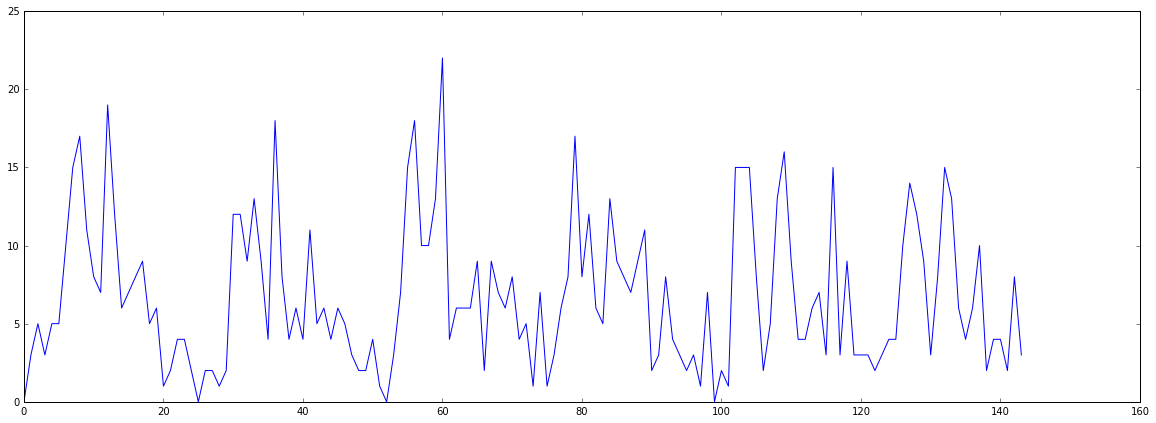

In [2]:
p = Poisson()
example = p.generate(6)

plt.figure(figsize=(20,7))
plt.plot(example)

### Train LSTM model on larger data set

In [ ]:
t1 = p.generate(10000)
t2 = p.generate(10000,2)
train = t1 + t2
l = LSTM()
l.train(train, 10)

### Apply the LSTM model to a new data set that is more varied

In [4]:
a1 = p.generate(4)
a2 = p.generate(2,2)
a3 = p.generate(4)
a4 = p.generate(1,2)
actual = numpy.concatenate((a1,a2,a3,a4))

pred = l.predict(actual)

### Plot the prediction

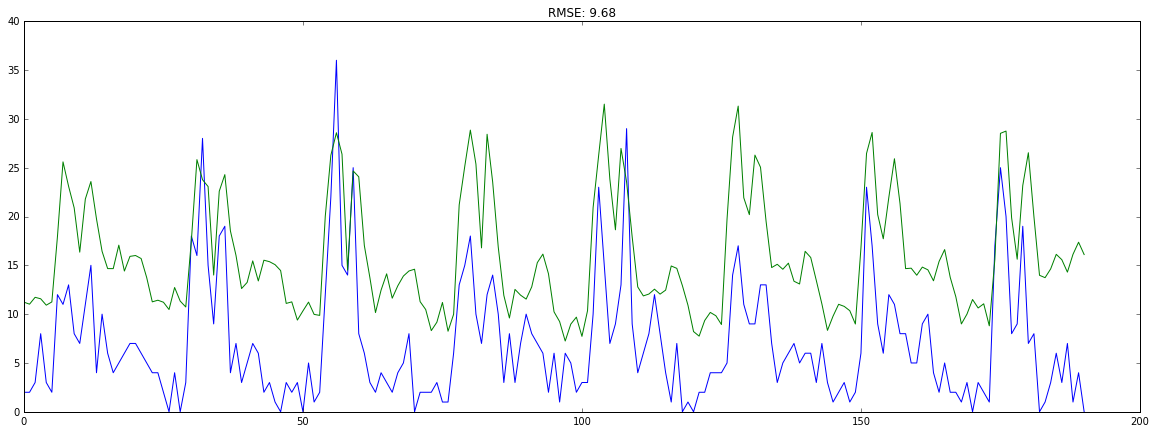

In [5]:
actual = actual[72:-1]
error = math.sqrt(mean_squared_error(pred, actual))

plt.figure(figsize=(20,7))
plt.title('RMSE: {:.2f}'.format(error))
plt.plot(actual)
plt.plot(pred)

### Evaluate the residual

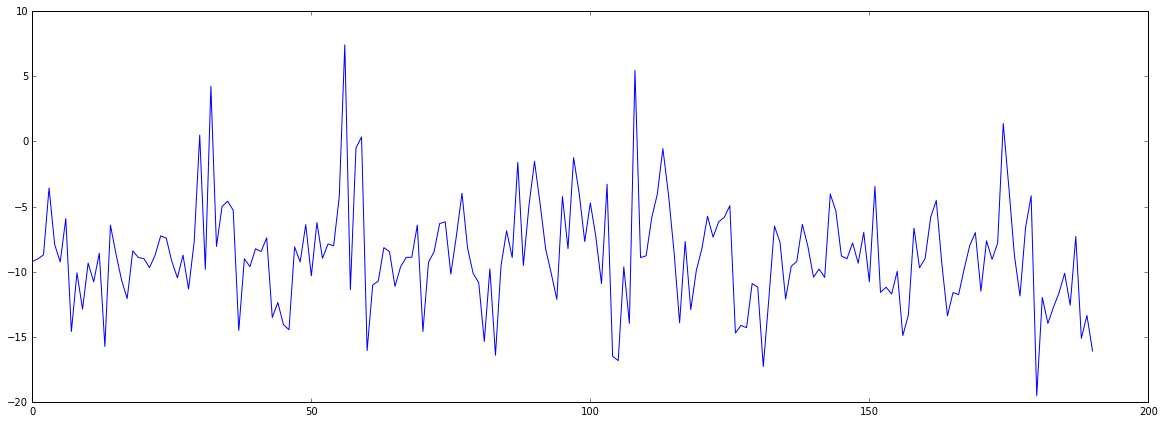

In [6]:
residual = []
for i in range(len(actual)):
    val = actual[i] - pred[i]
    residual.append(val)

plt.figure(figsize=(20,7))
plt.plot(residual)

### General results

LSTM is a very interesting mechanism for learning patterns.  However, there are several drawbacks to using it with the type of data presented here.  First, the data has to be scaled appropriately. If the data isn't scaled properly it either is constrained in magnitude or it is hard to train to fit the data.  The first case arises if the training data is small compared to data that is experienced after training.  The second case arises when there is a good collection of training data, but the global mean is much higher than the local mean, as in the case depicted above.  This case results in poor convergence on training.  It is possible that we could perform the LSTM on the derivative of something of that nature, but we cannot use LSTM under all possible cases without problem.  It is true that we can use LSTM on a more constrained data set with less problem.  Regardless, the residual has strong correlation with the fundamental data, which isn't a very convincing fit to the data.